In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import pandas_profiling
import scipy.stats as stats
import seaborn as sns
import numpy as np
import itertools



%matplotlib inline

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
data_file_name = "../data/train.csv"
target_column_name = "HasDetections"

In [4]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float32',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int16',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float64', # was 'float32'
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float32', # was 'float16'
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float32', # was 'float16'
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float64', # was 'float32'
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float64', # was 'float32'
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float32', # was 'float16'
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float32', # was 'float16'
        'Census_InternalPrimaryDisplayResolutionVertical':      'float32', # was 'float16'
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float64', # was 'float32'
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [5]:
p = 0.05
df = pd.read_csv(
        data_file_name,
        header=0, 
        skiprows=lambda i: i>0 and random.random() > p,
        dtype=dtypes
)

## basic info

In [6]:
df.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,000016191b897145d069102325cab760,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1094.0,0,7.0,0,NaN,53447.0,...,51039.0,0,0.0,0.0,0,0,0.0,0.0,15.0,1
1,00001f26e9e5775277d6231fc6ac9e70,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1372.0,0,7.0,0,NaN,36429.0,...,51601.0,1,NaN,0.0,0,0,0.0,1.0,3.0,0
2,00002c6cccecdef94aaa557d0458ab8a,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1795.0,0,7.0,0,NaN,47238.0,...,8919.0,1,NaN,0.0,0,0,0.0,1.0,1.0,1
3,0000714f389b8a3638597ee69b655e38,win8defender,1.1.14600.4,4.9.10586.494,1.263.469.0,0,7.0,0,NaN,53447.0,...,33075.0,1,0.0,0.0,1,0,0.0,0.0,1.0,1
4,0000a313e380907701398b3c61f58848,win8defender,1.1.15200.1,4.18.1807.18075,1.275.330.0,0,7.0,0,NaN,7945.0,...,9685.0,1,0.0,0.0,0,0,0.0,0.0,10.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445519 entries, 0 to 445518
Data columns (total 83 columns):
MachineIdentifier                                    445519 non-null category
ProductName                                          445519 non-null category
EngineVersion                                        445519 non-null category
AppVersion                                           445519 non-null category
AvSigVersion                                         445519 non-null category
IsBeta                                               445519 non-null int8
RtpStateBitfield                                     443917 non-null float16
IsSxsPassiveMode                                     445519 non-null int8
DefaultBrowsersIdentifier                            21376 non-null float32
AVProductStatesIdentifier                            443710 non-null float32
AVProductsInstalled                                  443710 non-null float16
AVProductsEnabled                           

In [8]:
df['Census_GenuineStateName'].value_counts(dropna=False)

IS_GENUINE         393607
INVALID_LICENSE     39849
OFFLINE             11367
UNKNOWN               696
Name: Census_GenuineStateName, dtype: int64

In [9]:
df.describe(percentiles=[.02,.05,.1,.25, .5, .75,.9,.95,.98])

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,445519.000000,443917.0,445519.000000,21376.000000,443710.000000,443710.0,443710.0,445519.000000,445519.000000,429298.000000,...,437350.000000,445519.000000,162859.0,444730.0,445519.000000,445519.000000,441891.0,430225.0,430225.0,445519.000000
mean,0.000007,NaN,0.017319,1657.108521,47882.941406,NaN,NaN,0.987998,107.922614,81374.523438,...,32993.691406,0.486065,0.0,0.0,0.124365,0.037772,0.0,NaN,NaN,0.498917
std,0.002595,0.0,0.130458,997.321472,13990.252930,0.0,0.0,0.108893,63.042243,48940.160156,...,21208.816406,0.499806,0.0,0.0,0.329998,0.190644,0.0,0.0,0.0,0.499999
min,0.000000,0.0,0.000000,1.000000,39.000000,1.0,0.0,0.000000,1.000000,12.000000,...,13.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,0.000000
2%,0.000000,0.0,0.000000,146.000000,7945.000000,1.0,1.0,1.000000,9.000000,1482.000000,...,3298.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,0.000000
5%,0.000000,7.0,0.000000,146.000000,7945.000000,1.0,1.0,1.000000,16.000000,5433.000000,...,4291.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,0.000000
10%,0.000000,7.0,0.000000,239.000000,23657.000000,1.0,1.0,1.000000,29.000000,12607.000000,...,7271.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,0.000000
25%,0.000000,7.0,0.000000,788.000000,49480.000000,1.0,1.0,1.000000,51.000000,36825.000000,...,13154.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,3.0,0.000000
50%,0.000000,7.0,0.000000,1632.000000,53447.000000,1.0,1.0,1.000000,97.000000,82373.000000,...,33066.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,10.0,0.000000
75%,0.000000,7.0,0.000000,2369.000000,53447.000000,2.0,1.0,1.000000,162.000000,124015.000000,...,52412.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,1.0,11.0,1.000000


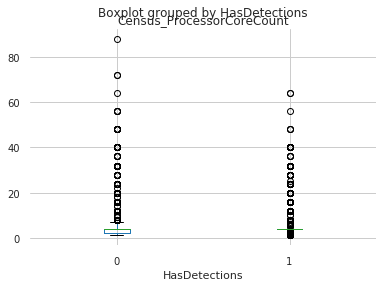

In [10]:
df.boxplot(column="Census_ProcessorCoreCount", by="HasDetections")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                 2.424e+05
Date:                Tue, 31 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:59:26   Log-Likelihood:            -4.3437e+06
No. Observations:              445519   AIC:                         8.687e+06
Df Residuals:                  445517   BIC:                         8.687e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        219.0593     13.390     16.360      0.0

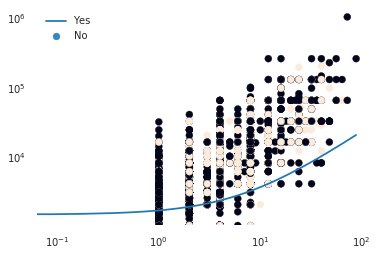

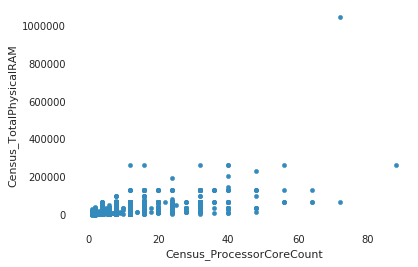

In [11]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

X = df["Census_ProcessorCoreCount"].fillna(0).values
Y = df["Census_TotalPhysicalRAM"].fillna(0).values
c = df["HasDetections"]

results = sm.OLS(Y,sm.add_constant(X)).fit()

print(results.summary())

plt.scatter(X,Y,c=c)
X_plot = np.linspace(0,df["Census_ProcessorCoreCount"].fillna(0).max(),1000)
plt.plot(X_plot, X_plot*results.params[0] + results.params[1])
plt.yscale('log')
plt.xscale('log')
plt.legend(["Yes", "No"])
plt.show()
df.plot.scatter("Census_ProcessorCoreCount","Census_TotalPhysicalRAM")

In [17]:
df["Census_ProcessorCoreCount_Filled"] = df["Census_ProcessorCoreCount"].fillna(0)
df["Census_TotalPhysicalRAM_Filled"] = df["Census_TotalPhysicalRAM"].fillna(0)
g = sns.lmplot(x="Census_ProcessorCoreCount_Filled",
               y="Census_TotalPhysicalRAM_Filled", 
               hue="HasDetections",
               data=df,
               palette={0: 'g', 1: 'y'},
              logx=True)
plt.show()

KeyError: 'Census_ProcessorCoreCount'

## Distribution of HasDetections

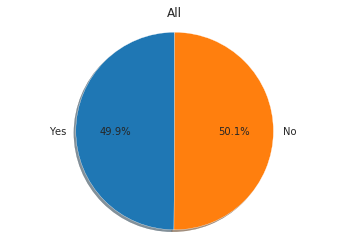

In [13]:
def draw_proportions_of_detections(df, title):
    labels = 'Yes', 'No'
    sizes = [len(df[df[target_column_name] == 1]), len(df[df[target_column_name] == 0])]
    fig1, ax1 = plt.subplots()
    ax1.pie(x=sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title(title)
    plt.show()
    
draw_proportions_of_detections(df, 'All')

In [14]:
green_features = [
    "Census_InternalPrimaryDiagonalDisplaySizeInInches",
    "Census_InternalPrimaryDisplayResolutionHorizontal",
    "Census_InternalPrimaryDisplayResolutionVertical",
    "Census_GenuineStateName",
    "Census_ActivationChannel",
    "Census_FirmwareManufacturerIdentifier",
    "Census_FirmwareVersionIdentifier",
    "Census_IsTouchEnabled",
    "Census_IsPenCapable",
    "Census_IsAlwaysOnAlwaysConnectedCapable",
    "Wdft_IsGamer"
]
columns = green_features + [target_column_name]
df = df[columns]

## Profiling columns
### Profiling the whole file

In [15]:
profile_all = pandas_profiling.ProfileReport(df)
profile_all.to_file("profile_green.html")

/home/yaron/anaconda3/envs/microsoft-challenge/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


/home/yaron/anaconda3/envs/microsoft-challenge/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


### Profiling where HasDetections=1

In [16]:
profile_has_detections = pandas_profiling.ProfileReport(df[df[target_column_name] == 1])
profile_has_detections.to_file("profile_green_has_detections.html")

In [18]:
categorial_features = [
    "Census_GenuineStateName",
    "Census_ActivationChannel",
    "Census_FirmwareManufacturerIdentifier",
    "Census_FirmwareVersionIdentifier",
    "Census_IsTouchEnabled",
    "Census_IsPenCapable",
    "Census_IsAlwaysOnAlwaysConnectedCapable",
    "Wdft_IsGamer"
                      ]

numeric_features = [
        "Census_InternalPrimaryDiagonalDisplaySizeInInches",
        "Census_InternalPrimaryDisplayResolutionHorizontal",
        "Census_InternalPrimaryDisplayResolutionVertical"
                   ]

In [19]:
def plot_for_target_categorial(df ,col, log_scale=False):
    plt.figure(figsize=(11,4))
    g = sns.countplot(x=col, hue=target_column_name, data=df,palette=["C1", "C0"],
                      order = df[col].value_counts().iloc[:22].index)
    g.set_xticklabels(g.get_xticklabels(),rotation=90)
    if log_scale:
        g.set_yscale('log')
    plt.show()
    
def plot_for_target_numeric(df ,col, log_scale=False):
    plt.figure(figsize=(11,4))
    g = sns.distplot(a=df[df[target_column_name] == 0][col], norm_hist=True)
    g.set_xticklabels(g.get_xticklabels(),rotation=90)
    if log_scale:
        g.set_yscale('log')
    #plt.show()
    #plt.figure(figsize=(11,4))
    g = sns.distplot(a=df[df[target_column_name] == 1][col])
    g.set_xticklabels(g.get_xticklabels(),rotation=90, norm_hist=True)
    if log_scale:
        g.set_yscale('log')
    plt.show()

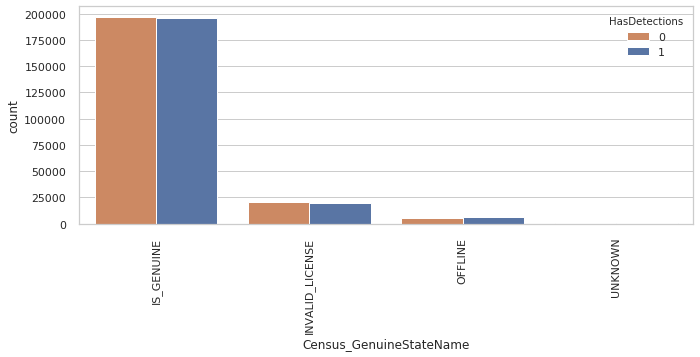

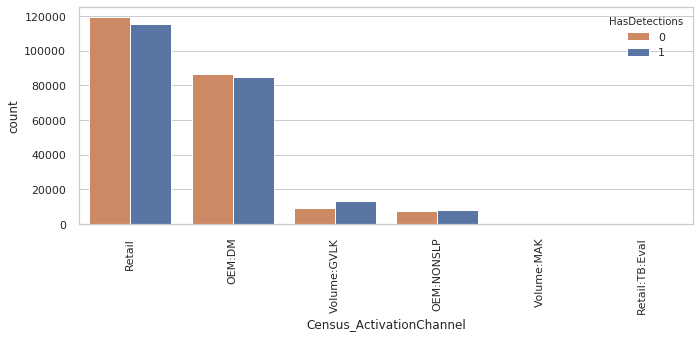

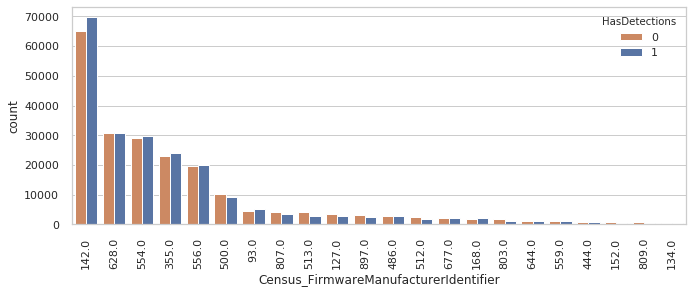

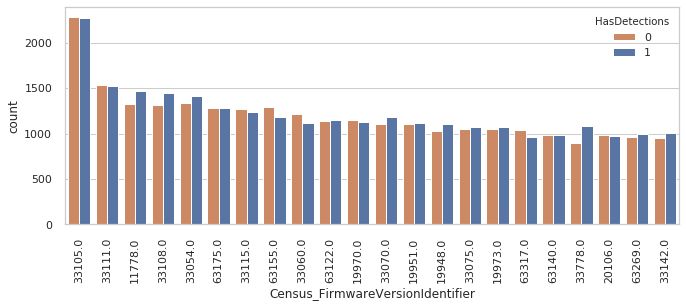

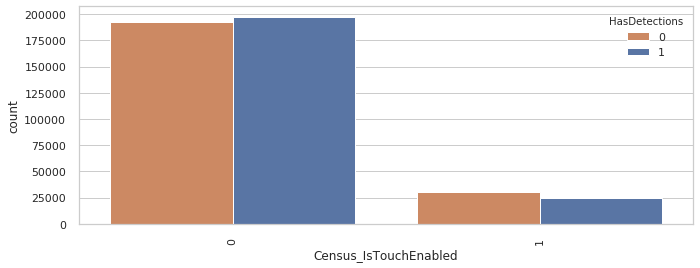

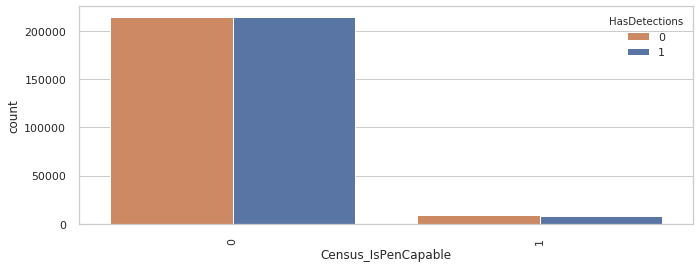

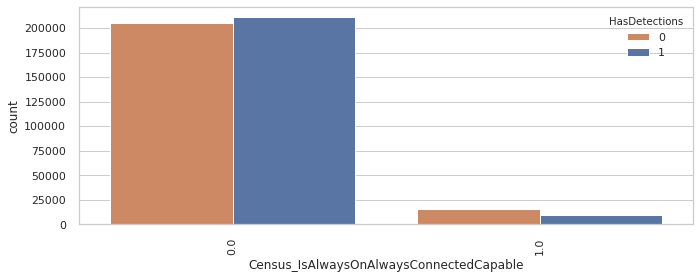

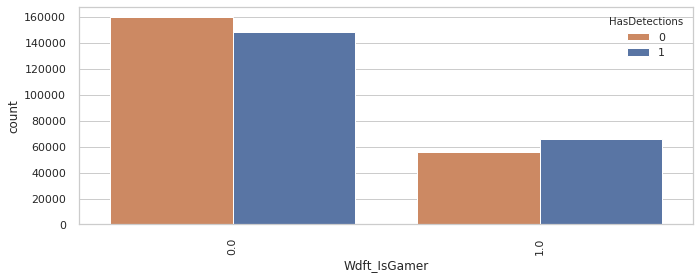

In [28]:
for column in categorial_features:
    plot_for_target_categorial(df, column, log_scale=False)

## Missing values

Column Census_InternalPrimaryDiagonalDisplaySizeInInches includes 2308 missing values,which is 0.52% of the values


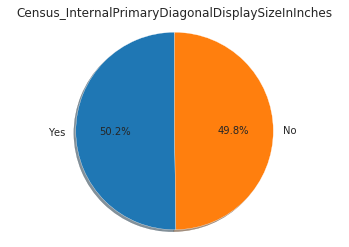

Ttest_indResult(statistic=0.313023488736732, pvalue=0.7542629633512221)
Column Census_InternalPrimaryDisplayResolutionHorizontal includes 2300 missing values,which is 0.52% of the values


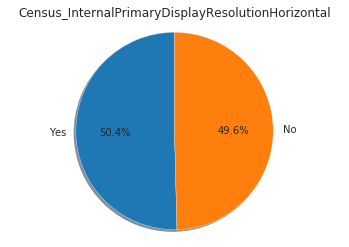

Ttest_indResult(statistic=0.4804462189798601, pvalue=0.6309103721990689)
Column Census_InternalPrimaryDisplayResolutionVertical includes 2300 missing values,which is 0.52% of the values


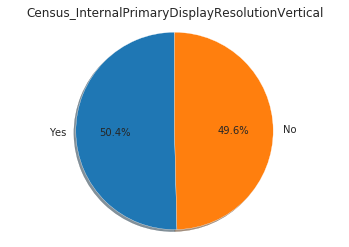

Ttest_indResult(statistic=0.4804462189798601, pvalue=0.6309103721990689)
Column Census_GenuineStateName includes 0 missing values,which is 0.0% of the values
Ttest_indResult(statistic=nan, pvalue=nan)
Column Census_ActivationChannel includes 0 missing values,which is 0.0% of the values
Ttest_indResult(statistic=nan, pvalue=nan)
Column Census_FirmwareManufacturerIdentifier includes 9299 missing values,which is 2.1% of the values


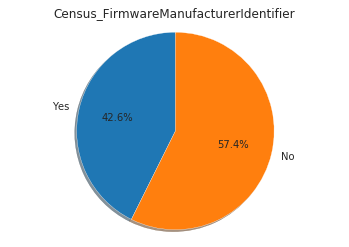

Ttest_indResult(statistic=-14.11826299891026, pvalue=2.998011361372331e-45)
Column Census_FirmwareVersionIdentifier includes 8169 missing values,which is 1.8% of the values


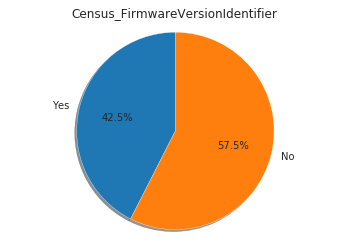

Ttest_indResult(statistic=-13.462314195854386, pvalue=2.655244969367697e-41)
Column Census_IsTouchEnabled includes 0 missing values,which is 0.0% of the values
Ttest_indResult(statistic=nan, pvalue=nan)
Column Census_IsPenCapable includes 0 missing values,which is 0.0% of the values
Ttest_indResult(statistic=nan, pvalue=nan)
Column Census_IsAlwaysOnAlwaysConnectedCapable includes 3628 missing values,which is 0.81% of the values


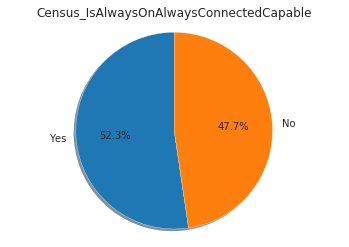

Ttest_indResult(statistic=2.9649703353836623, pvalue=0.003027281472590005)
Column Wdft_IsGamer includes 15294 missing values,which is 3.4% of the values


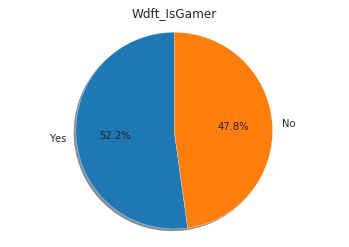

Ttest_indResult(statistic=5.802411847576354, pvalue=6.54117939230643e-09)


In [21]:
for column in green_features:
    null_data = df[df[column].isnull()]
    not_null_data = df[~df[column].isnull()]
    print(f"Column {column} includes {len(null_data)} missing values,"
          f"which is {100.0*(len(null_data)/len(df)):{2}.{2}}% of the values")
    if len(null_data) > 0:
        draw_proportions_of_detections(null_data, column)
    #TODO: binom_test
    result = stats.ttest_ind(null_data[target_column_name],not_null_data[target_column_name])
    print(result)

## Categorial features

### Check statistical significance

In [22]:
percent_detections = len(df[df[target_column_name] == 1])/len(df)
for column in categorial_features:
    values = df[column].unique()
    if len(values) < 15:
        #TODO: binary t-test or binom test
        pass
    with_detections = df[df[target_column_name] == 1][column].value_counts()
    total = df[column].value_counts(normalize=True)*len(df[df[target_column_name] == 1])
    chi2_result = (((with_detections-total)**2)/total).dropna().sum()
    from scipy.stats import chi2
    p_value = chi2.sf(chi2_result, len(with_detections)-1)
    print(f"For column {column}, the p_value: {p_value}, {len(with_detections)} possible values")
    #TODO: case of missing values in one example

For column Census_GenuineStateName, the p_value: 1.4571066351320454e-19, 4 possible values
For column Census_ActivationChannel, the p_value: 1.836456915536867e-95, 6 possible values
For column Census_FirmwareManufacturerIdentifier, the p_value: 2.181804063851761e-102, 200 possible values
For column Census_FirmwareVersionIdentifier, the p_value: 1.0, 16670 possible values
For column Census_IsTouchEnabled, the p_value: 5.862603676533471e-76, 2 possible values
For column Census_IsPenCapable, the p_value: 6.356143290053081e-15, 2 possible values
For column Census_IsAlwaysOnAlwaysConnectedCapable, the p_value: 4.53631278810234e-188, 2 possible values
For column Wdft_IsGamer, the p_value: 5.250057131086336e-194, 2 possible values


### Correlations

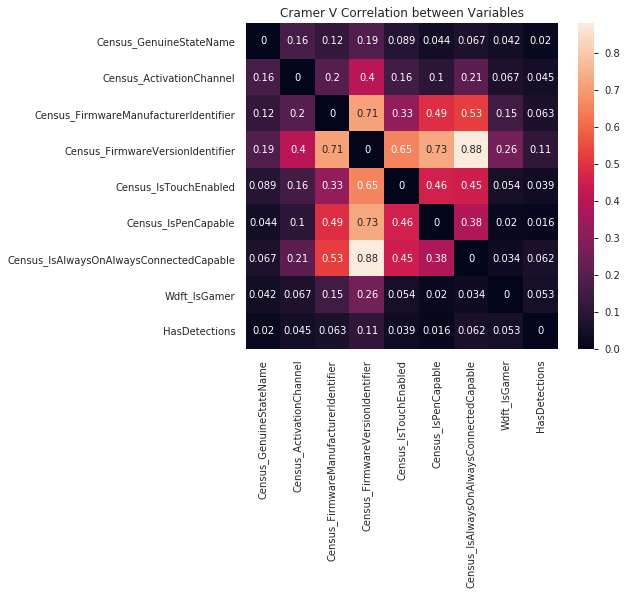

In [23]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

confusion_matrix = pd.crosstab(df[categorial_features[0]], df[categorial_features[1]]).as_matrix()
cols = categorial_features+[target_column_name]
corrM = np.zeros((len(cols),len(cols)))
# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_v(pd.crosstab(df[col1], df[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(corr, annot=True, ax=ax)
ax.set_title("Cramer V Correlation between Variables")
ax

In [24]:
ax

## Numeric features

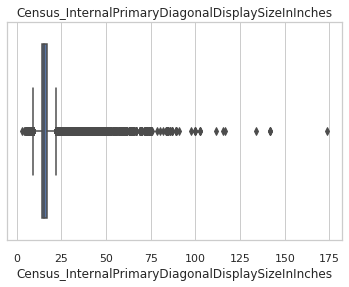

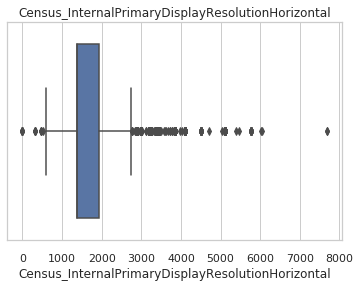

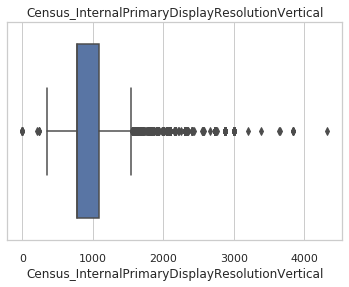

In [25]:
for column in numeric_features:
    sns.set(style="whitegrid")
    ax = sns.boxplot(x=df[column])
    ax.set_title(column)
    plt.show()

In [33]:
df.groupby(target_column_name)[numeric_features].mean()

,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical
HasDetections,,,
0,16.468336,1535.612061,894.216492
1,16.875944,1559.511597,900.497131


In [40]:
# for bigger screen size there are more detections
df[df["Census_InternalPrimaryDiagonalDisplaySizeInInches"] > 21.0][target_column_name].hist()
df[df["Census_InternalPrimaryDiagonalDisplaySizeInInches"] < 14.0][target_column_name].hist()

,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_GenuineStateName,Census_ActivationChannel,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,HasDetections,Census_InternalPrimaryDiagonalDisplaySizeInInches-log
342,NaN,NaN,NaN,OFFLINE,Retail,355.0,19956.0,0,0,0.0,NaN,0,NaN
508,NaN,NaN,NaN,IS_GENUINE,Volume:GVLK,355.0,19948.0,0,0,0.0,0.0,1,NaN
698,NaN,NaN,NaN,IS_GENUINE,Retail,554.0,33075.0,0,0,0.0,0.0,1,NaN
793,NaN,NaN,NaN,IS_GENUINE,Retail,355.0,20388.0,0,0,0.0,0.0,1,NaN
801,NaN,NaN,NaN,IS_GENUINE,Retail,628.0,19302.0,0,0,0.0,0.0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445146,NaN,NaN,NaN,IS_GENUINE,Retail,628.0,19198.0,0,0,0.0,0.0,0,NaN
445369,NaN,NaN,NaN,INVALID_LICENSE,Volume:GVLK,142.0,52485.0,0,0,0.0,0.0,0,NaN
445411,NaN,NaN,NaN,OFFLINE,Retail,NaN,NaN,0,0,NaN,0.0,1,NaN
445456,NaN,NaN,NaN,INVALID_LICENSE,Volume:GVLK,142.0,36198.0,0,0,0.0,0.0,1,NaN


In [50]:
unknown_screen_size = df[df["Census_InternalPrimaryDisplayResolutionHorizontal"] == -1]
unknown_screen_size["Census_InternalPrimaryDisplayResolutionVertical"].unique()

array([-1.])

### Numeric features correlation

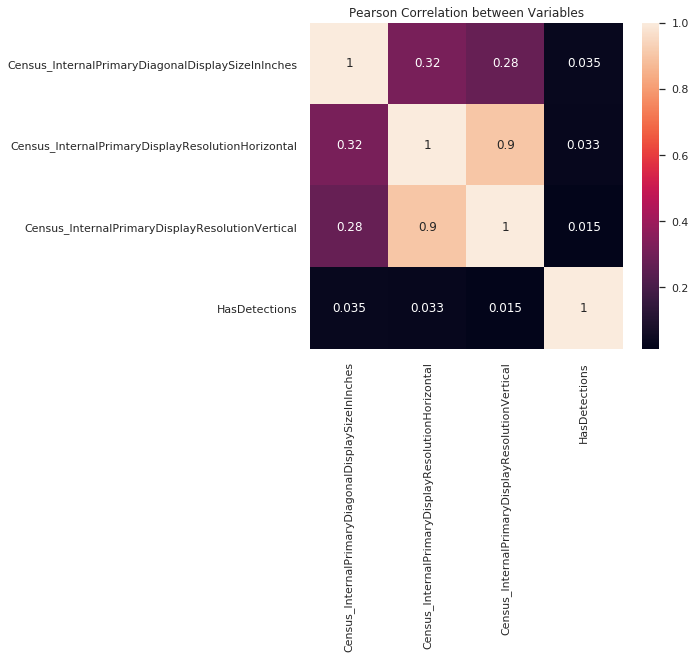

In [26]:
fig, ax = plt.subplots(figsize=(7, 6))
corr =df[numeric_features+[target_column_name]].corr(method='pearson')
ax = sns.heatmap(corr, annot=True, ax=ax)
ax.set_title("Pearson Correlation between Variables")
ax

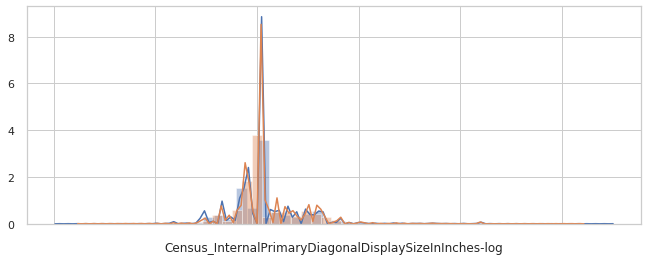

In [27]:
import math

log_columns =  [f"{column}-log" for column in numeric_features]
for column in numeric_features:
    try:
        df[f"{column}-log"] = df[column].apply(lambda x: math.log(x+1, 2)) #x+1 for zero disributions
        #plot_for_target_numeric(df, f"{column}-log", log_scale=True)
        plot_for_target_numeric(df, f"{column}-log", log_scale=False)
        plot_for_target_numeric(df, column, log_scale=False)
    except:
        pass

In [ ]:
#TODO: other test, F-Distrubution
for column in numeric_features:
    result = stats.ttest_ind(df[df[target_column_name] == 0][column],
                             df[df[target_column_name] == 1][column])
    print(result)



In [33]:
from sklearn.decomposition import PCA

# TODO: change this
df[numeric_features].fillna(0, inplace=True)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[numeric_features-['Census_PrimaryDiskTotalCapacity']].values)
result = pd.DataFrame()
result['pca-one'] = pca_result[:,0]
result['pca-two'] = pca_result[:,1] 
result['pca-three'] = df[target_column_name]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=result
    legend="full",
    alpha=0.3
)







In [ ]:
# TODO: boxplot to numerical features regards
# Dataset has 74107 (16.6%) duplicate rows, a lot!!!